Importing the Dependencies

In [73]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and analysis

In [74]:
# loading the data from csv to a pandas file

insurance_dataset = pd.read_csv('d:\qtree projeccts\csv and excel files\machine learning project\medical insurance.csv')

<>:3: SyntaxWarning: invalid escape sequence '\q'
<>:3: SyntaxWarning: invalid escape sequence '\q'
C:\Users\ANAND\AppData\Local\Temp\ipykernel_2296\3464565030.py:3: SyntaxWarning: invalid escape sequence '\q'
  insurance_dataset = pd.read_csv('d:\qtree projeccts\csv and excel files\machine learning project\medical insurance.csv')


In [75]:
# print the first 5 rows
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
# print the last 5 rows
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [77]:
# number of rows and columns in the dataset
insurance_dataset.shape

(1338, 7)

In [78]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

* Sex
* Smoke
* Region

In [79]:
# checking the missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [80]:
# statistical measures of the dataset
insurance_dataset.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


<Figure size 600x600 with 0 Axes>

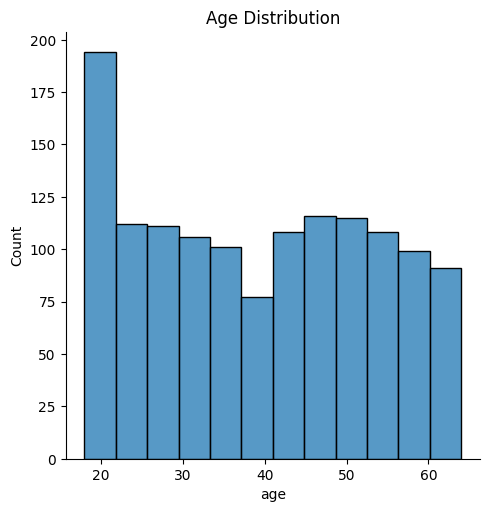

In [81]:
# distribution of age values
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()


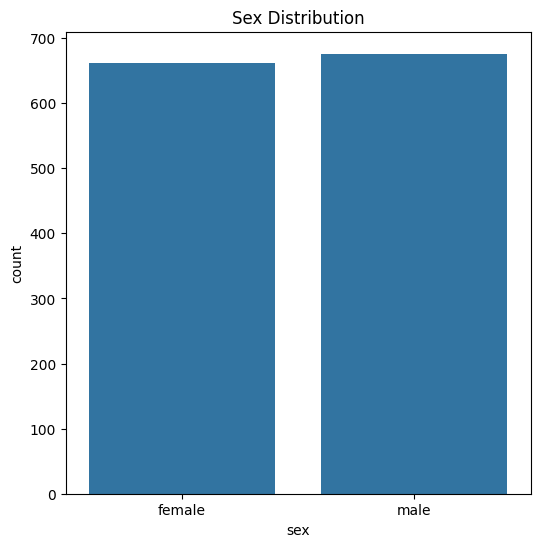

In [82]:
# gender column 
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()


In [83]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

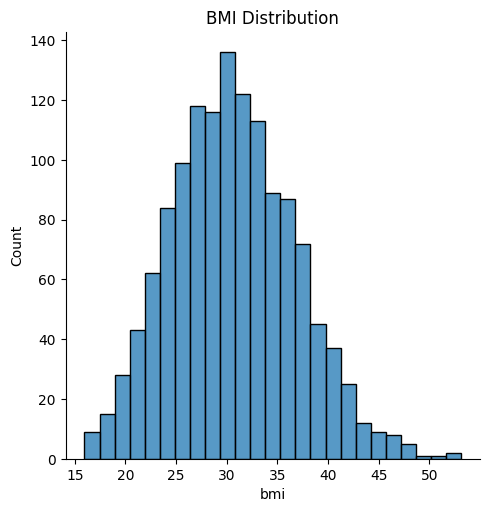

In [84]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()



Normal BMI Range --> 18.5 to 24.9

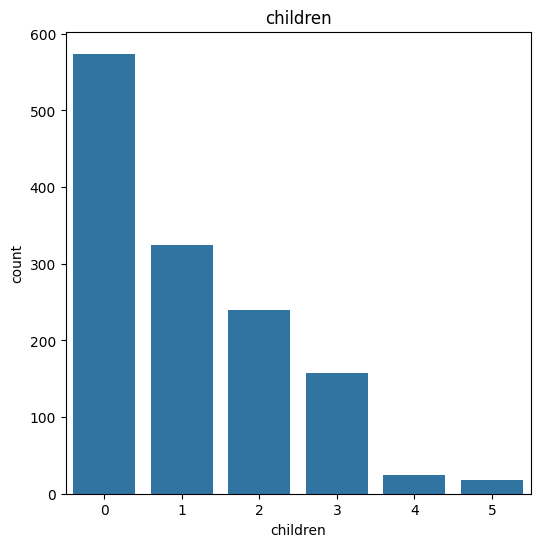

In [85]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children')
plt.show()


In [86]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

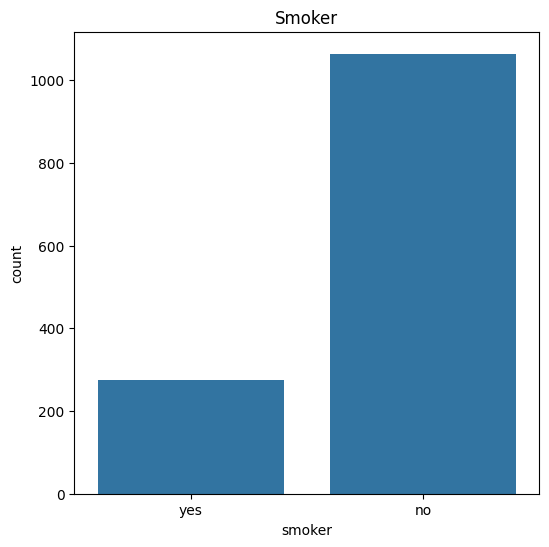

In [87]:
# smoker column 
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker')
plt.show()


In [88]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

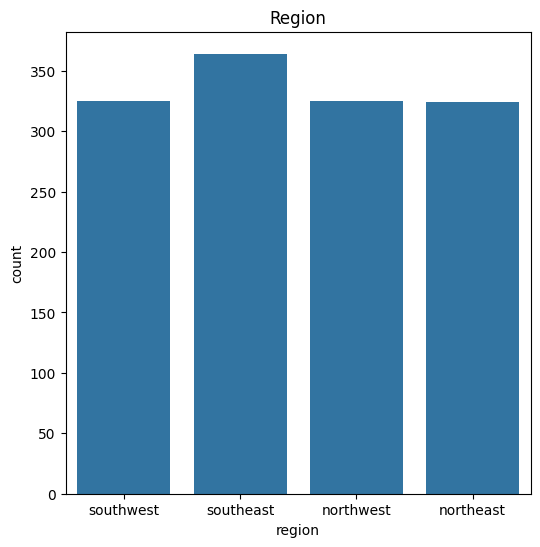

In [89]:
# region column 
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region')
plt.show()


In [90]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

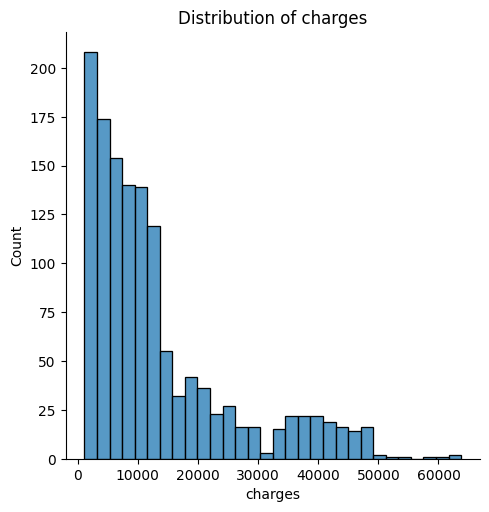

In [91]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Distribution of charges')
plt.show()



Dat Preprocessing

Encoding the categorical features

In [92]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':1, 'female':0}}, inplace=True)

# encoding smoker column
insurance_dataset.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)

# encoding region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


C:\Users\ANAND\AppData\Local\Temp\ipykernel_2296\4109774000.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':1, 'female':0}}, inplace=True)
C:\Users\ANAND\AppData\Local\Temp\ipykernel_2296\4109774000.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)
C:\Users\ANAND\AppData\Local\Temp\ipykernel_2296\4109774000.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

In [93]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Splitting the features and target

In [94]:
x = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [95]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]


In [96]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training data and test data

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [98]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regressor

In [99]:
# loading the linear regressior
regressor = LinearRegression()

In [100]:
regressor.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [101]:
# prediction on training data
training_data_predictoin = regressor.predict(x_train)

In [102]:
# R squared value
r2_value = metrics.r2_score(y_train,training_data_predictoin)
print("R squared value: ", r2_value)

R squared value:  0.751505643411174


In [103]:
# prediction on test data
test_data_predictoin = regressor.predict(x_test)

# R squared value
r2_value = metrics.r2_score(y_test,test_data_predictoin)
print("R squared value: ", r2_value)

R squared value:  0.7447273869684077


Building a predictive system

In [104]:
input_data = (60,1,25.84,0,1,3)

# changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("The Insurance Cost in USD ", prediction[0])

[35622.54558327]
The Insurance Cost in USD  35622.54558327097


c:\Users\ANAND\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [105]:
import pickle

In [106]:
data = {"model":regressor}
with open("med_ins_cost_prediction_model.pkl",'wb') as file:
    pickle.dump(data,file)